# Mobile Big Data - Assignment 1: CDR Dataset Analysis

## Assignment Overview

**Dataset:** Mobile Phone Activity (Kaggle)

**Files Analyzed:**
- sms-call-internet-mi-2013-11-02.csv
- sms-call-internet-mi-2013-11-04.csv
- sms-call-internet-mi-2013-11-06.csv

## Import Libraries

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)


## Data Loading and Merging



In [135]:
# Loading three days of CDR data and combining them into a single dataset.
file1 = "./sms-call-internet-mi-2013-11-02.csv"
file2 = "./sms-call-internet-mi-2013-11-04.csv"
file3 = "./sms-call-internet-mi-2013-11-06.csv"

# Load the three datasets

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
df3 = pd.read_csv(file3)

print(f"Dataset 1 shape: {df1.shape}")
print(f"Dataset 2 shape: {df2.shape}")
print(f"Dataset 3 shape: {df3.shape}")

# Combine datasets
combined_df = pd.concat([df1, df2, df3], ignore_index=True)
print(f"\nCombined dataset shape: {combined_df.shape}")
print(f"Total records: {len(combined_df):,}")

Dataset 1 shape: (1847331, 8)
Dataset 2 shape: (2299544, 8)
Dataset 3 shape: (2417156, 8)

Combined dataset shape: (6564031, 8)
Total records: 6,564,031


## Add Date and Time Column

In [136]:
# Convert datetime column to datetime type
combined_df['datetime'] = pd.to_datetime(combined_df['datetime'])

# Extract date and time features
combined_df['date'] = combined_df['datetime'].dt.date
combined_df['hour'] = combined_df['datetime'].dt.hour
combined_df['is_weekend'] = combined_df['datetime'].dt.dayofweek >= 5

# Define time periods
combined_df['time_period'] = combined_df['hour'].apply(
    lambda x: 'Daytime' if 6 <= x < 20 else 'Nighttime'
)

print("\nSample data")
combined_df[['datetime', 'date', 'hour', 'time_period']].head()


Sample data


,datetime,date,hour,time_period
0,2013-11-02,2013-11-02,0,Nighttime
1,2013-11-02,2013-11-02,0,Nighttime
2,2013-11-02,2013-11-02,0,Nighttime
3,2013-11-02,2013-11-02,0,Nighttime
4,2013-11-02,2013-11-02,0,Nighttime


## Handling Missing Values

In [137]:
# Fill missing values with the mean of each numeric column
print("Missing values before imputation")
missing_before = combined_df.isnull().sum()
print(missing_before[missing_before > 0])
print(f"\nTotal missing values: {missing_before.sum():,}")

# Identify numeric columns
numeric_cols = combined_df.select_dtypes(include=[np.number]).columns
print(f"\nNumeric columns to process: {list(numeric_cols)}")

Missing values before imputation
smsin       3964171
smsout      5025738
callin      4761685
callout     3764484
internet    3621117
dtype: int64

Total missing values: 21,137,195

Numeric columns to process: ['CellID', 'countrycode', 'smsin', 'smsout', 'callin', 'callout', 'internet', 'hour']


In [138]:
records_modified = 0
imputation_summary = []

for col in numeric_cols:
    missing_count = combined_df[col].isnull().sum()
    if missing_count > 0:
        mean_value = combined_df[col].mean()
        combined_df[col] = combined_df[col].fillna(mean_value)
        
        records_modified += missing_count
        
        imputation_summary.append({
            'Column': col,
            'Missing_Count': missing_count,
            'Mean_Value': mean_value
        })
        
        print(f" Filled {missing_count:,} missing values in '{col}' with mean: {mean_value:.2f}")


print(f"Total records modified: {records_modified:,}")


# Verify no missing values remain
print(f"\nMissing values after imputation: {combined_df.isnull().sum().sum()}")

 Filled 3,964,171 missing values in 'smsin' with mean: 7.86
 Filled 5,025,738 missing values in 'smsout' with mean: 7.44
 Filled 4,761,685 missing values in 'callin' with mean: 7.74
 Filled 3,764,484 missing values in 'callout' with mean: 5.69
 Filled 3,621,117 missing values in 'internet' with mean: 101.98
Total records modified: 21,137,195

Missing values after imputation: 0


## Add Aggregate Columns

In [139]:
# Create aggregate columns
combined_df['total_sms'] = combined_df['smsin'].fillna(0) + combined_df['smsout'].fillna(0)
combined_df['total_calls'] = combined_df['callin'].fillna(0) + combined_df['callout'].fillna(0)
combined_df['total_internet'] = combined_df['internet'].fillna(0)
combined_df['total_activity'] = combined_df['total_sms'] + combined_df['total_calls'] + combined_df['total_internet']

print("\nSummary statistics:")
combined_df[['total_sms', 'total_calls', 'total_internet', 'total_activity']].describe()


Summary statistics:


,total_sms,total_calls,total_internet,total_activity
count,6.564031e+06,6.564031e+06,6.564031e+06,6.564031e+06
mean,1.530273e+01,1.342530e+01,1.019762e+02,1.307042e+02
std,2.822765e+01,3.252595e+01,2.852160e+02,3.380664e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e-04
25%,7.884876e+00,7.752804e+00,2.819000e-01,2.888203e+01
50%,1.530273e+01,1.342530e+01,1.019762e+02,1.199549e+02
75%,1.530273e+01,1.342530e+01,1.019762e+02,1.250359e+02
max,4.503561e+03,2.724374e+03,3.174863e+04,3.564692e+04


## Total Records for all 3 datasets

TOTAL RECORDS

Total records across all 3 datasets: 6,564,031

Breakdown by dataset:
  - Dataset 1 (Nov 2): 1,847,331 records
  - Dataset 2 (Nov 4): 2,299,544 records
  - Dataset 3 (Nov 6): 2,417,156 records


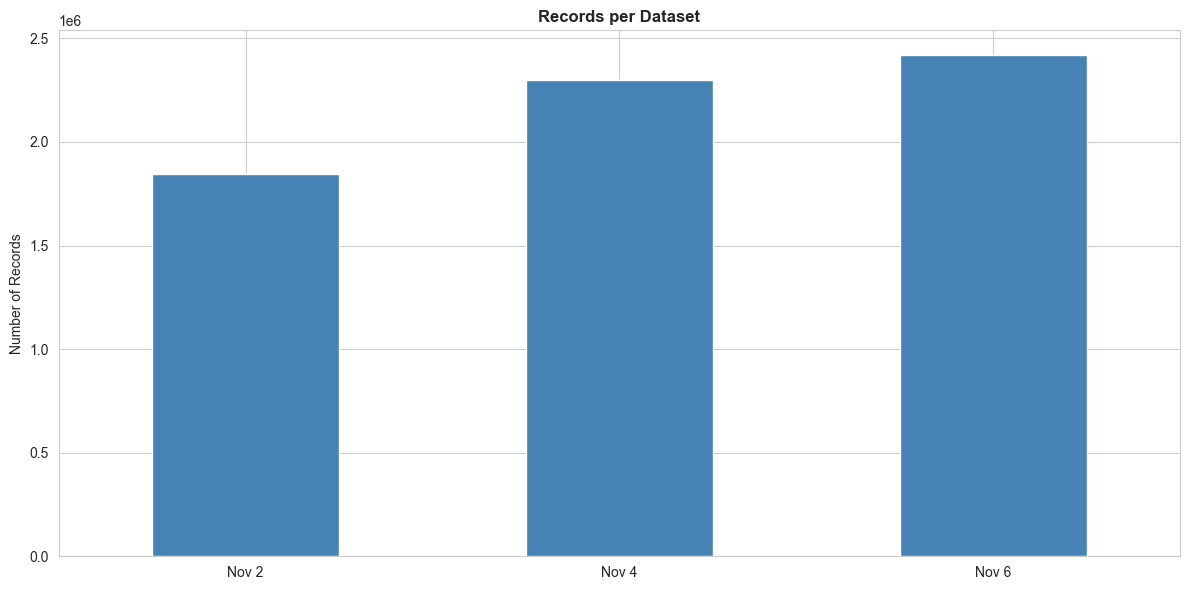

In [140]:
total_records = len(combined_df)

print("TOTAL RECORDS")
print(f"\nTotal records across all 3 datasets: {total_records:,}")

print(f"\nBreakdown by dataset:")
print(f"  - Dataset 1 (Nov 2): {len(df1):,} records")
print(f"  - Dataset 2 (Nov 4): {len(df2):,} records")
print(f"  - Dataset 3 (Nov 6): {len(df3):,} records")

# Visualization
dataset_sizes = pd.Series([len(df1), len(df2), len(df3)], 
                          index=['Nov 2', 'Nov 4', 'Nov 6'])
dataset_sizes.plot(kind='bar', color='steelblue')
plt.title('Records per Dataset', fontweight='bold')
plt.ylabel('Number of Records')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Unique Grid Squares

In [141]:
# unique grid squares (CellID)
unique_cells = combined_df['CellID'].nunique()

print("UNIQUE GRID SQUARES")
print(f"\nNumber of unique grid squares (CellID): {unique_cells}")

print(f"\nGrid square statistics:")
print(f"  - Total CellID entries: {len(combined_df['CellID']):,}")
print(f"  - Unique CellIDs: {unique_cells}")
print(f"  - Average records per CellID: {len(combined_df) / unique_cells:.2f}")
print(f"  - Min records for a CellID: {combined_df['CellID'].value_counts().min()}")
print(f"  - Max records for a CellID: {combined_df['CellID'].value_counts().max()}")

UNIQUE GRID SQUARES

Number of unique grid squares (CellID): 10000

Grid square statistics:
  - Total CellID entries: 6,564,031
  - Unique CellIDs: 10000
  - Average records per CellID: 656.40
  - Min records for a CellID: 145
  - Max records for a CellID: 2856


## Unique Country Codes

In [142]:
# unique country codes appear in the data
unique_countries = combined_df['countrycode'].nunique()

print("UNIQUE COUNTRY CODES")
print(f"\nNumber of unique country codes: {unique_countries}")

print(f"\nTop 10 country codes by frequency:")
country_counts = combined_df['countrycode'].value_counts().head(10)
print(country_counts)

# Assuming country code 39 is Italy (domestic)
if 39 in combined_df['countrycode'].values:
    domestic_pct = (combined_df['countrycode'] == 39).sum() / len(combined_df) * 100
    print(f"\nDomestic (Italy, code 39): {domestic_pct:.2f}%")
    print(f"International: {100 - domestic_pct:.2f}%")

UNIQUE COUNTRY CODES

Number of unique country codes: 302

Top 10 country codes by frequency:
countrycode
39    719995
0     680922
33    367897
46    358619
49    319060
41    277421
44    249160
20    248855
40    206778
32    179671
Name: count, dtype: int64

Domestic (Italy, code 39): 10.97%
International: 89.03%


## Missing Values Analysis

In [143]:
# Records modified during imputation

print(" MISSING VALUES ANALYSIS")

# Display imputation summary
if imputation_summary:
    imputation_df = pd.DataFrame(imputation_summary)
    print("\nColumns with missing values (BEFORE imputation):")
    print(imputation_df.to_string(index=False))
    
    print(f"\nMost common columns with missing values:")
    top_missing = imputation_df.nlargest(3, 'Missing_Count')
    for idx, row in top_missing.iterrows():
        pct = (row['Missing_Count'] / len(combined_df)) * 100
        print(f"  {idx+1}. {row['Column']}: {row['Missing_Count']:,} ({pct:.2f}%)")
else:
    print("\nNo missing values found in the dataset!")

print(f"\nTotal records modified during imputation: {records_modified:,}")
print(f"Missing values after imputation: {combined_df.isnull().sum().sum()}")

 MISSING VALUES ANALYSIS

Columns with missing values (BEFORE imputation):
  Column  Missing_Count  Mean_Value
   smsin        3964171    7.861976
  smsout        5025738    7.440751
  callin        4761685    7.738604
 callout        3764484    5.686694
internet        3621117  101.976153

Most common columns with missing values:
  2. smsout: 5,025,738 (76.56%)
  3. callin: 4,761,685 (72.54%)
  1. smsin: 3,964,171 (60.39%)

Total records modified during imputation: 21,137,195
Missing values after imputation: 0


## Peak Activity Hours

In [144]:
#  most common peak hour and statistics for total calls by hour.

print("PEAK ACTIVITY HOURS")


# Calculate hourly activity
hourly_activity = combined_df.groupby('hour')['total_activity'].sum()

peak_hour = hourly_activity.idxmax()
lowest_hour = hourly_activity.idxmin()

print(f"\nMost common peak hour: {peak_hour}:00")
print(f"Lowest activity hour: {lowest_hour}:00")

print(f"\nHourly Activity Summary:")
print(f"  - Peak hour activity: {hourly_activity.max():,.0f}")
print(f"  - Lowest hour activity: {hourly_activity.min():,.0f}")
print(f"  - Average hourly activity: {hourly_activity.mean():,.0f}")

PEAK ACTIVITY HOURS

Most common peak hour: 17:00
Lowest activity hour: 4:00

Hourly Activity Summary:
  - Peak hour activity: 51,477,441
  - Lowest hour activity: 11,777,007
  - Average hourly activity: 35,747,762


In [145]:
# Statistical summary for total calls by hour
hourly_calls = combined_df.groupby('hour')['total_calls'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
])

print("\nDetailed hourly call statistics")
print("\n")
print(hourly_calls)


Detailed hourly call statistics


       count       mean     median        std     min        max
hour                                                            
0     150207  10.280157  13.425298   5.279040  0.0002   223.4941
1     119415   9.928661  13.425298   5.129893  0.0000   141.9847
2     103908   9.894713  13.425298   5.329786  0.0000   210.9691
3      97566   9.953373  13.425298   5.649571  0.0000   298.3541
4     107494  10.235666  13.425298   5.294288  0.0000   255.0555
5     124507  10.029019  13.425298   5.395003  0.0000   177.1690
6     173260  10.339697  13.425298   4.969421  0.0002   201.3488
7     240986  11.464472  13.425298   8.435423  0.0000   412.7314
8     318128  13.272816  13.425298  22.237365  0.0000  1122.7091
9     365181  14.508306  13.425298  35.498836  0.0000  1972.8289
10    379767  14.923601   9.520804  41.338244  0.0000  2402.6425
11    380616  15.033117   8.908054  43.038147  0.0000  2565.0524
12    388125  14.506823   8.501204  41.418042  0.0000  

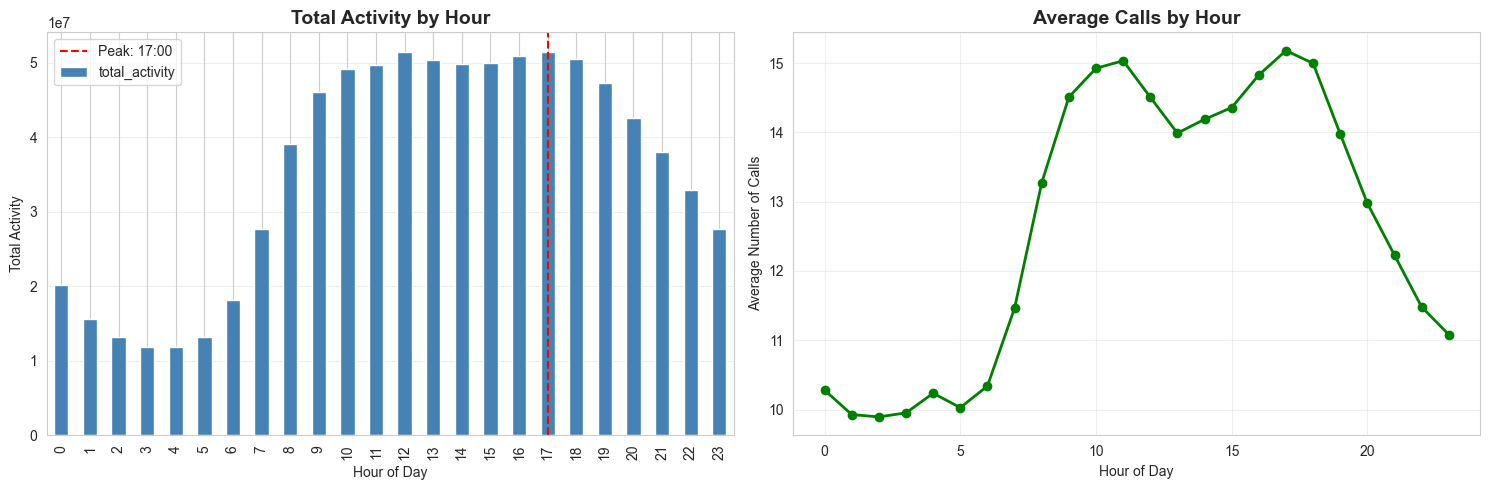

In [146]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Hourly activity
hourly_activity.plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Total Activity by Hour', fontweight='bold', fontsize=14)
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Total Activity')
axes[0].axvline(peak_hour, color='red', linestyle='--', label=f'Peak: {peak_hour}:00')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Calls by hour
hourly_calls['mean'].plot(kind='line', ax=axes[1], marker='o', color='green', linewidth=2)
axes[1].set_title('Average Calls by Hour', fontweight='bold', fontsize=14)
axes[1].set_xlabel('Hour of Day')
axes[1].set_ylabel('Average Number of Calls')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Daytime vs Nighttime Activity

DAYTIME VS NIGHTTIME ACTIVITY

Activity Distribution:
  - Daytime (6am-8pm): 73.55%
  - Nighttime (8pm-6am): 26.45%

Absolute values:
  - Daytime activity: 631,027,957
  - Nighttime activity: 226,918,320


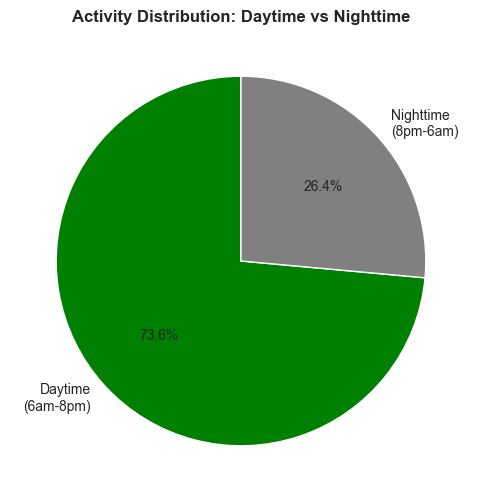

In [158]:
# percentage of total activity happens during daytime (6am-8pm) vs nighttime (8pm-6am)

print("DAYTIME VS NIGHTTIME ACTIVITY")


# Calculate percentages
daytime_activity = combined_df[combined_df['time_period'] == 'Daytime']['total_activity'].sum()
nighttime_activity = combined_df[combined_df['time_period'] == 'Nighttime']['total_activity'].sum()
total_activity_sum = daytime_activity + nighttime_activity

daytime_pct = (daytime_activity / total_activity_sum) * 100
nighttime_pct = (nighttime_activity / total_activity_sum) * 100

print(f"\nActivity Distribution:")
print(f"  - Daytime (6am-8pm): {daytime_pct:.2f}%")
print(f"  - Nighttime (8pm-6am): {nighttime_pct:.2f}%")

print(f"\nAbsolute values:")
print(f"  - Daytime activity: {daytime_activity:,.0f}")
print(f"  - Nighttime activity: {nighttime_activity:,.0f}")

# Visualization
period_data = pd.Series([daytime_pct, nighttime_pct], 
                        index=['Daytime\n(6am-8pm)', 'Nighttime\n(8pm-6am)'])
period_data.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['green', 'grey'])
plt.title('Activity Distribution: Daytime vs Nighttime', fontweight='bold')
plt.ylabel('')
plt.show()

## International vs Domestic Patterns

In [159]:
#  international calls vs domestic calls
print("INTERNATIONAL VS DOMESTIC CALL PATTERNS")


# Compare hourly patterns (assuming 39 is Italy)
domestic_hourly = combined_df[combined_df['countrycode'] == 39].groupby('hour')['total_calls'].sum()
international_hourly = combined_df[combined_df['countrycode'] != 39].groupby('hour')['total_calls'].sum()

print("\nHourly Pattern Comparison:")
print(f"  - Domestic (Italy) peak hour: {domestic_hourly.idxmax()}:00")
print(f"  - International peak hour: {international_hourly.idxmax()}:00")

# Calculate correlation
correlation = domestic_hourly.corr(international_hourly)
print(f"\nCorrelation between domestic and international patterns: {correlation:.3f}")

if correlation > 0.7:
    interpretation = "Strong positive correlation - patterns are very similar"
elif correlation > 0.3:
    interpretation = "Moderate positive correlation - some similarity in patterns"
else:
    interpretation = "Weak correlation - patterns differ significantly"
    
print(f"Interpretation: {interpretation}")

INTERNATIONAL VS DOMESTIC CALL PATTERNS

Hourly Pattern Comparison:
  - Domestic (Italy) peak hour: 17:00
  - International peak hour: 12:00

Correlation between domestic and international patterns: 0.937
Interpretation: Strong positive correlation - patterns are very similar


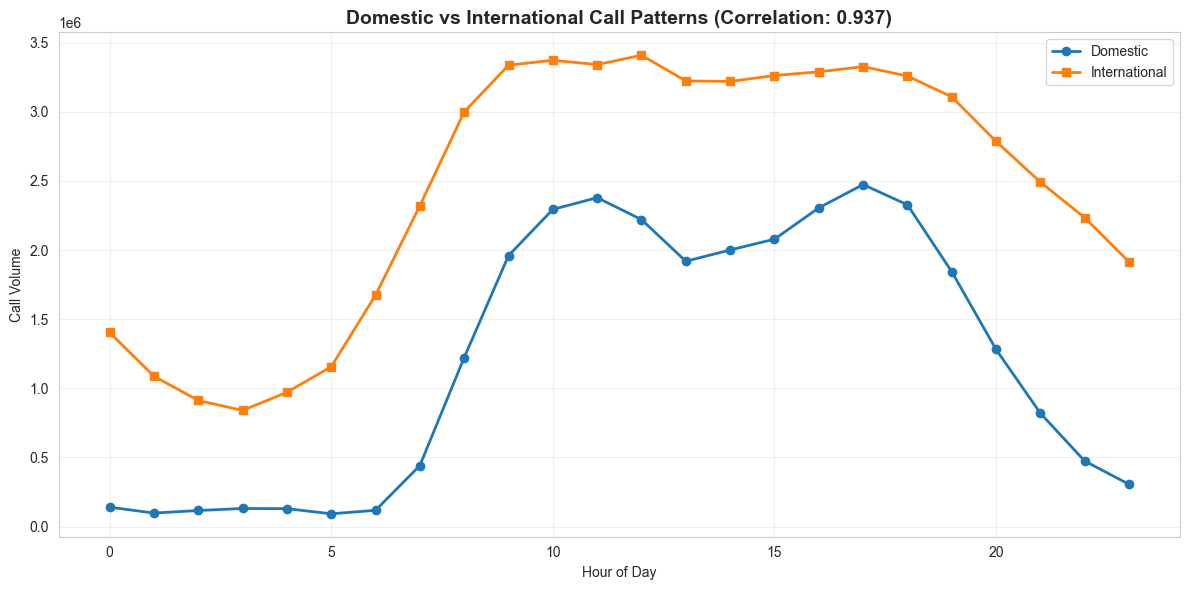

In [149]:
# Visualization
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(domestic_hourly.index, domestic_hourly.values,
        marker='o', label='Domestic', linewidth=2, markersize=6)
ax.plot(international_hourly.index, international_hourly.values,
        marker='s', label='International', linewidth=2, markersize=6)

ax.set_title(
    f'Domestic vs International Call Patterns (Correlation: {correlation:.3f})',
    fontweight='bold',
    fontsize=14
)
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Call Volume')
ax.legend()
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()


## Comparisons

### Domestic vs International Analysis

In [150]:
print("DOMESTIC VS INTERNATIONAL ANALYSIS")
# Create masks
domestic_mask = combined_df['countrycode'] == 39
international_mask = combined_df['countrycode'] != 39

# 1. Calls distribution
total_calls = combined_df['total_calls'].sum()
domestic_calls = combined_df[domestic_mask]['total_calls'].sum()
international_calls = combined_df[international_mask]['total_calls'].sum()
domestic_call_pct = (domestic_calls / total_calls) * 100
international_call_pct = (international_calls / total_calls) * 100

print(f"\n1. Call Distribution:")
print(f"   - Domestic calls: {domestic_call_pct:.2f}%")
print(f"   - International calls: {international_call_pct:.2f}%")

DOMESTIC VS INTERNATIONAL ANALYSIS

1. Call Distribution:
   - Domestic calls: 33.11%
   - International calls: 66.89%


In [151]:
# 2. SMS distribution
total_sms = combined_df['total_sms'].sum()
domestic_sms = combined_df[domestic_mask]['total_sms'].sum()
international_sms = combined_df[international_mask]['total_sms'].sum()

domestic_sms_pct = (domestic_sms / total_sms) * 100
international_sms_pct = (international_sms / total_sms) * 100

print(f"\n2. SMS Distribution:")
print(f"   - Domestic SMS: {domestic_sms_pct:.2f}%")
print(f"   - International SMS: {international_sms_pct:.2f}%")


2. SMS Distribution:
   - Domestic SMS: 24.98%
   - International SMS: 75.02%


In [152]:
# count domestic vs international calls features
domestic_calls_count = combined_df[domestic_mask].shape[0]
international_calls_count = combined_df[international_mask].shape[0]
print(f"\n3. Record Counts:")
print(f"   - Domestic call records: {domestic_calls_count:,}")
print(f"   - International call records: {international_calls_count:,}")


3. Record Counts:
   - Domestic call records: 719,995
   - International call records: 5,844,036


In [153]:
# 3. International calls: incoming vs outgoing ratio
intl_incoming = combined_df[international_mask]['callin'].sum()
intl_outgoing = combined_df[international_mask]['callout'].sum()
intl_ratio = intl_incoming / intl_outgoing if intl_outgoing > 0 else 0

print(f"\n3. International Call Pattern:")
print(f"   - Incoming calls: {intl_incoming:,.0f}")
print(f"   - Outgoing calls: {intl_outgoing:,.0f}")
print(f"   - Incoming/Outgoing ratio: {intl_ratio:.3f}")

if intl_ratio > 1:
    print(f"   → International calls are more INCOMING (by {(intl_ratio-1)*100:.1f}%)")
elif intl_ratio < 1:
    print(f"   → International calls are more OUTGOING (by {(1-intl_ratio)*100:.1f}%)")
else:
    print(f"   → International calls are balanced between incoming and outgoing")


3. International Call Pattern:
   - Incoming calls: 36,911,801
   - Outgoing calls: 22,038,041
   - Incoming/Outgoing ratio: 1.675
   → International calls are more INCOMING (by 67.5%)


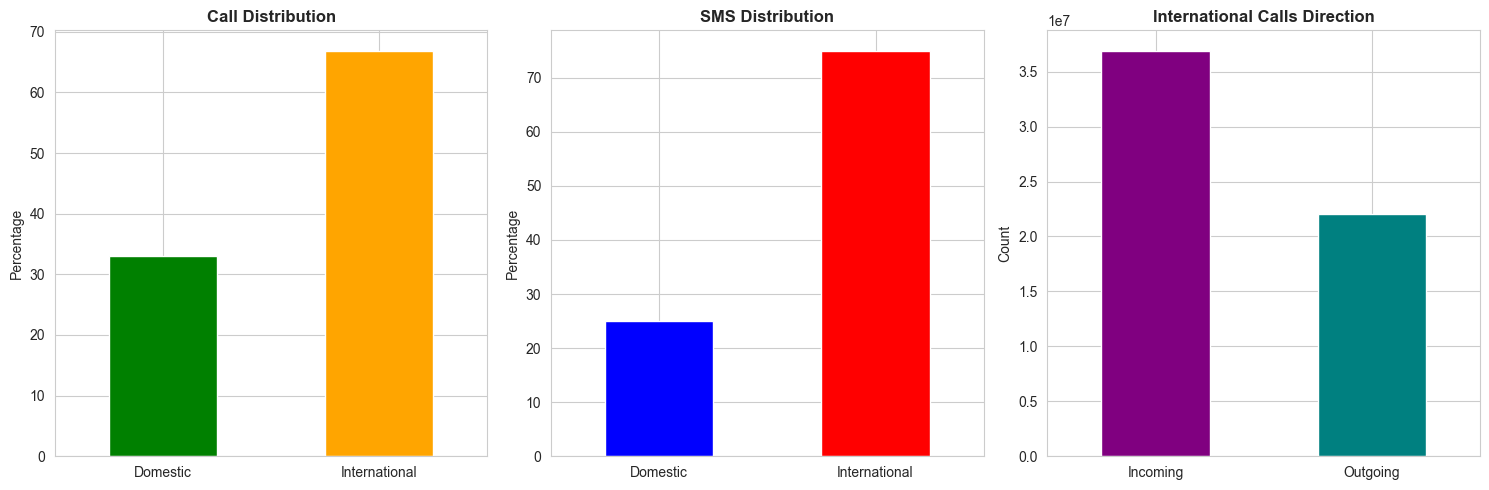

In [154]:
# Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Calls
call_data = pd.Series([domestic_call_pct, international_call_pct], 
                      index=['Domestic', 'International'])
call_data.plot(kind='bar', ax=axes[0], color=['green', 'orange'])
axes[0].set_title('Call Distribution', fontweight='bold')
axes[0].set_ylabel('Percentage')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# SMS
sms_data = pd.Series([domestic_sms_pct, international_sms_pct], 
                     index=['Domestic', 'International'])
sms_data.plot(kind='bar', ax=axes[1], color=['blue', 'red'])
axes[1].set_title('SMS Distribution', fontweight='bold')
axes[1].set_ylabel('Percentage')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

# International calls direction
intl_direction = pd.Series([intl_incoming, intl_outgoing], 
                          index=['Incoming', 'Outgoing'])
intl_direction.plot(kind='bar', ax=axes[2], color=['purple', 'teal'])
axes[2].set_title('International Calls Direction', fontweight='bold')
axes[2].set_ylabel('Count')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

###  SMS vs Calls Correlation

In [160]:
print("SMS VS CALLS CORRELATION ANALYSIS")

# Aggregate by grid square (CellID)
grid_activity = combined_df.groupby('CellID').agg({
    'total_sms': 'sum',
    'total_calls': 'sum',
    'total_internet': 'sum'
})

# Convert to numpy arrays
sms_array = grid_activity['total_sms'].values
calls_array = grid_activity['total_calls'].values

# Calculate correlation using numpy
correlation_matrix = np.corrcoef(sms_array, calls_array)
correlation = correlation_matrix[0, 1]

print(f"\nCorrelation between SMS and Call volume at grid level: {correlation:.4f}")

# Interpret correlation strength
if abs(correlation) > 0.7:
    strength = "Strong"
elif abs(correlation) > 0.4:
    strength = "Moderate"
else:
    strength = "Weak"

direction = "positive" if correlation > 0 else "negative"
print(f"Interpretation: {strength} {direction} correlation")

if correlation > 0:
    print(" Grids with high SMS volume tend to have high call volume")
    print(" This suggests that busy areas have both high SMS and call activity")
else:
    print(" Grids with high SMS volume tend to have low call volume")
    print(" This suggests substitution behavior between SMS and calls")

SMS VS CALLS CORRELATION ANALYSIS

Correlation between SMS and Call volume at grid level: 0.9862
Interpretation: Strong positive correlation
 Grids with high SMS volume tend to have high call volume
 This suggests that busy areas have both high SMS and call activity


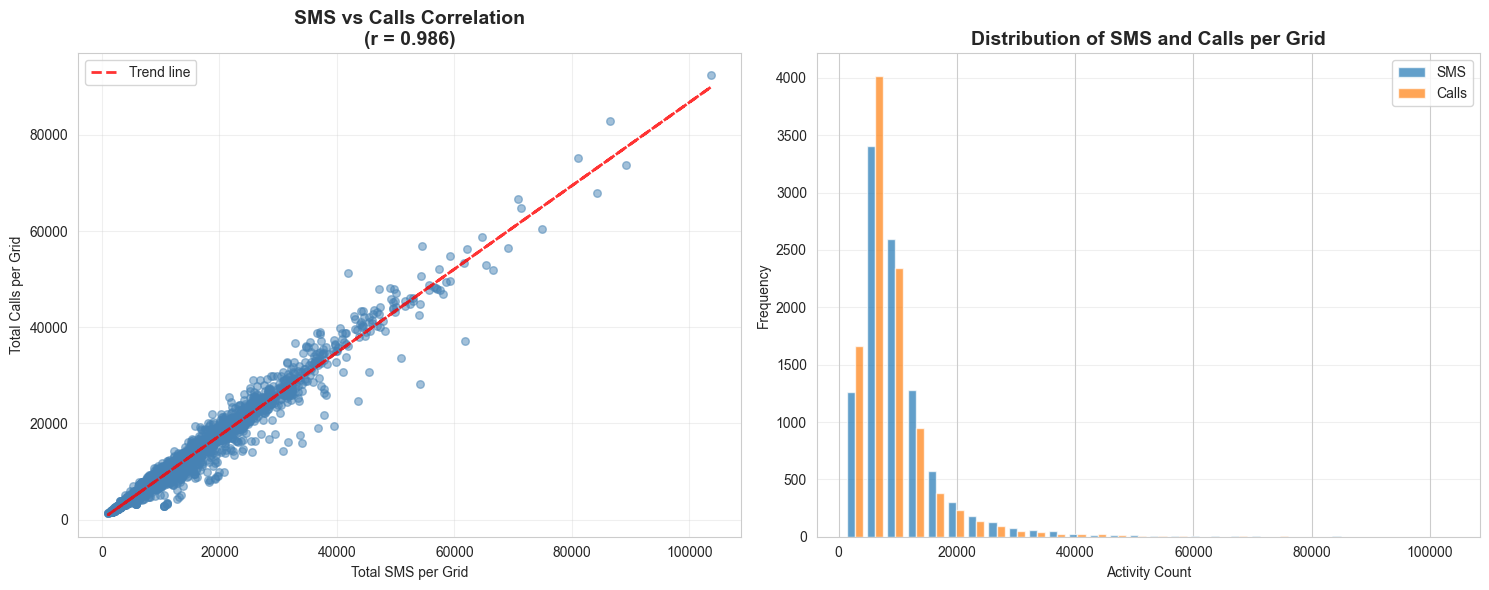

In [157]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot
axes[0].scatter(sms_array, calls_array, alpha=0.5, s=30, color='steelblue')
axes[0].set_title(f'SMS vs Calls Correlation\n(r = {correlation:.3f})', 
                  fontweight='bold', fontsize=14)
axes[0].set_xlabel('Total SMS per Grid')
axes[0].set_ylabel('Total Calls per Grid')

# Add regression line
z = np.polyfit(sms_array, calls_array, 1)
p = np.poly1d(z)
axes[0].plot(sms_array, p(sms_array), "r--", alpha=0.8, linewidth=2, label='Trend line')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Distribution comparison
axes[1].hist([sms_array, calls_array], bins=30, label=['SMS', 'Calls'], alpha=0.7)
axes[1].set_title('Distribution of SMS and Calls per Grid', fontweight='bold', fontsize=14)
axes[1].set_xlabel('Activity Count')
axes[1].set_ylabel('Frequency')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()